# Volume transmittance

The transmittance represents the probability of a particle to travel through a volume or media without interacting.

$$
T(x_a, x_b) = \exp\left(-\int_{x_a}^{x_b} \sigma(x_t) dx_t\right)
$$

In rendervous there are several ways to estimate $T$, digital analyzers (DDA), ray-marching (RM), delta-tracking (DT) and ratio tracking (RT). 

In [1]:
try: # install all dependencies in colab 
    import google.colab
    !sudo apt-get update -y
    !sudo apt-get install -y libnvidia-gl-555 vulkan-tools glslang-tools vulkan-validationlayers-dev
    !pip install pyav==13.1.0
    !pip install git+https://github.com/rendervous/rendervous_project.git
except:
    print("Executing locally")

Executing locally


In [2]:
import torch
import rendervous as rdv
import matplotlib.pyplot as plt
import vulky.datasets as datasets

cloud = datasets.Volumes.disney_cloud

camera = rdv.PerspectiveCameraSensor(512, 512, rdv.look_at_poses((-2.8, 0.2, -.4)))

## DDA

In here, a traversal through the volume decompose the ray in segments determined by the intersections with the volume grid.
Given the lengths of the segments $\Delta_k$ and the middle points $x_k$ the transmittance is estimated deterministically as:

$$
\langle T \rangle = \exp\left( - \sum \Delta_k \sigma(x_k) \right)
$$



stdin


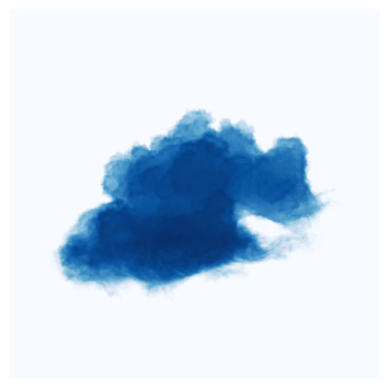

In [3]:
bmin, bmax = rdv.normalized_box(cloud)
grid = rdv.Grid3D(cloud * 5, bmin, bmax)
boundary = rdv.ray_box_intersection[bmin, bmax]
field_T = rdv.GridDDATransmittance(grid, boundary)

T = camera.capture(field_T)

plt.imshow(T[0].cpu(), cmap='Blues_r')
plt.gca().invert_yaxis()
plt.gca().axis('off')
plt.show()

stdin


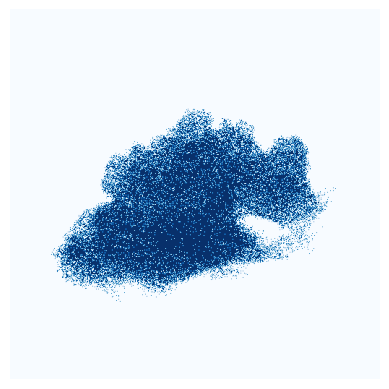

In [4]:
field_T = rdv.DeltatrackingTransmittance(grid, boundary, majorant=rdv.const[5.0, 10000.0])

T = camera.capture(field_T)

plt.imshow(T[0].cpu(), cmap='Blues_r')
plt.gca().invert_yaxis()
plt.gca().axis('off')
plt.show()

stdin


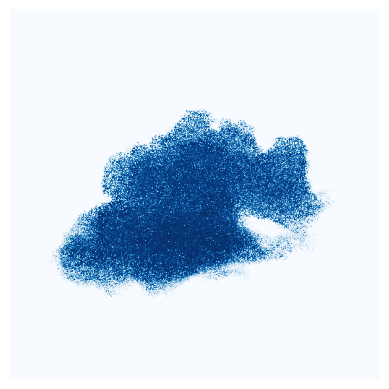

In [5]:
field_T = rdv.RatiotrackingTransmittance(grid, boundary, majorant=rdv.const[5.0, 10000.0])

T = camera.capture(field_T, fw_samples=1)

plt.imshow(T[0].cpu(), cmap='Blues_r')
plt.gca().invert_yaxis()
plt.gca().axis('off')
plt.show()

stdin


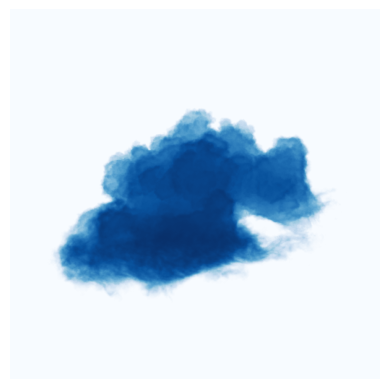

In [6]:
field_T = rdv.RaymarchingTransmittance(grid, boundary)

T = camera.capture(field_T, fw_samples=1)

plt.imshow(T[0].cpu(), cmap='Blues_r')
plt.gca().invert_yaxis()
plt.gca().axis('off')
plt.show()